In [34]:
import torch
from AntennaInverseNetwork import AntennaInverseNN
from AntennaNetwork import AntennaCNN

MODELS_PATH = "./saved/"

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

model = AntennaInverseNN()
model.eval()
model.load_state_dict(torch.load(MODELS_PATH + "AntennaInverseNN", map_location=torch.device(device)))

surr = AntennaCNN()
surr.eval()
surr.load_state_dict(torch.load(MODELS_PATH + "AntennaCNN", map_location=torch.device(device)))

<All keys matched successfully>

In [35]:
import numpy as np

DATA_PATH = "./data/"
# Create datasets for training the inverse model. 
# Use the training dataset from forward network
x_train_path = DATA_PATH + "x_train.npy"
y_train_path = DATA_PATH + "y_train.npy"

x_test_path = DATA_PATH + "x_test.npy"
y_test_path = DATA_PATH + "y_test.npy"

x_test = torch.tensor(np.load(x_test_path))
y_test = torch.tensor(np.load(y_test_path))

In [36]:
print(y_test.shape)

torch.Size([3941, 81])


In [42]:
import matplotlib.pyplot as plt

def predict(idx=10):
    with torch.no_grad():
        spectrum = y_test[idx,:]
        struct = x_test[idx,:].squeeze()
        print(spectrum.shape)
        output = model(spectrum.float(), m=1, use_threshold=True).reshape([12,12])
            
        # plt.subplot(1,2,1)
        # plt.imshow(output, cmap="gray")
        # plt.subplot(1,2,2)
        # Print Test dataset item and spectrum
        plt.imshow(1 - struct, cmap="gray")
        plt.title("Test Design, D")
        plt.figure()
        test_spectrum = spectrum.detach().numpy()
        plt.plot(test_spectrum)
        plt.title("Test Spectrum, S")
        plt.figure()
        pred_spectrum_of_d = surr(struct.float().unsqueeze(0).unsqueeze(0)).squeeze()
        plt.plot(pred_spectrum_of_d)
        plt.title("Forward Predicted Spectrum of D")
    
        # apply manual threshold to output
        # m = 20
        # output = 1/2 * (torch.tanh(m * (output - 1/2)) + 1)
        output = torch.where(output > 0.5, 1, 0) #hard thresholding to 1s or 0s
        
        plt.figure()
        plt.imshow(1 - output, cmap="gray")
        plt.title("Inverse Predicted Design, D'")
        plt.figure()
        pred_spectrum_of_dprime = surr(output.unsqueeze(0).unsqueeze(0)).squeeze()
        plt.plot(pred_spectrum_of_dprime)
        plt.title("Forward Predicted Spectrum of D'")
    
        plt.figure()
        plt.plot(test_spectrum)
        plt.plot(pred_spectrum_of_d)
        plt.plot(pred_spectrum_of_dprime)
        plt.title("Compared spectrums")
        plt.legend(["Input Spectrum (test set)", "Predicted of D", "Predicted of D'"])
        
        # m = 20
        # print(1/2 * (torch.tanh(m * (output - 1/2)) + 1))
        # print(struct)

torch.Size([81])


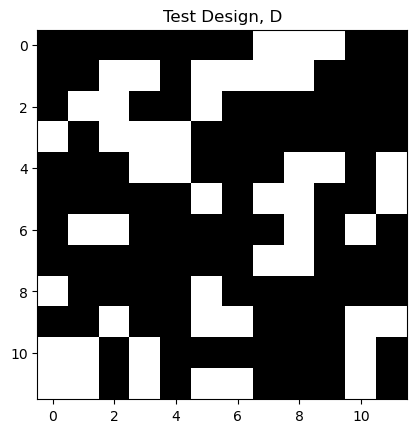

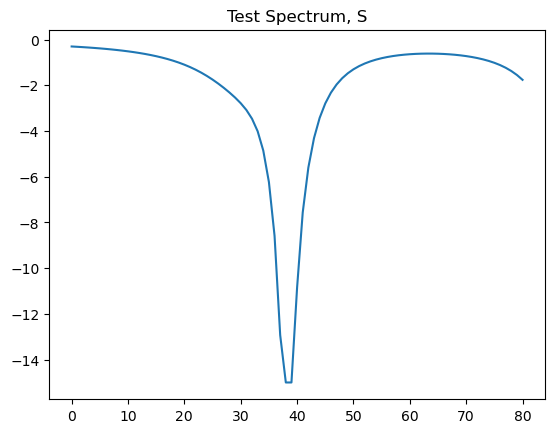

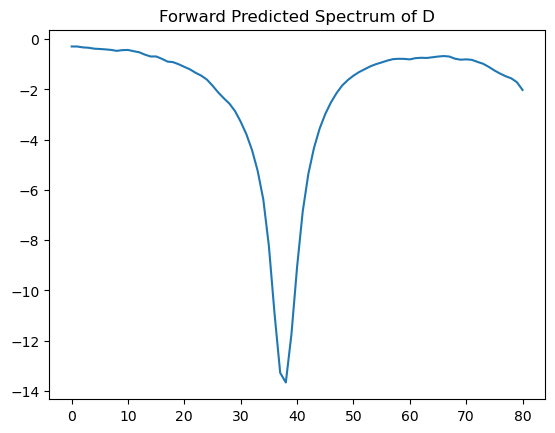

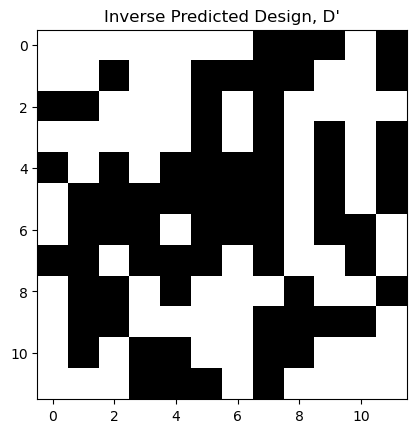

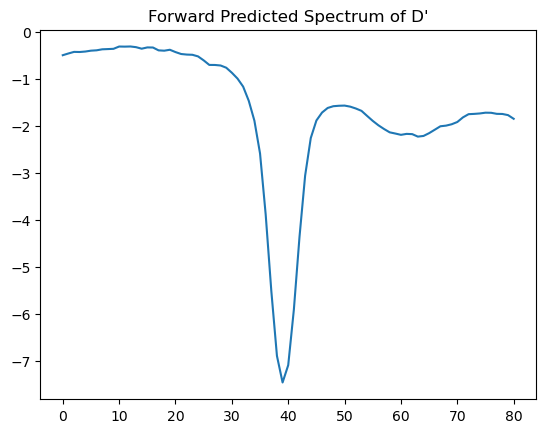

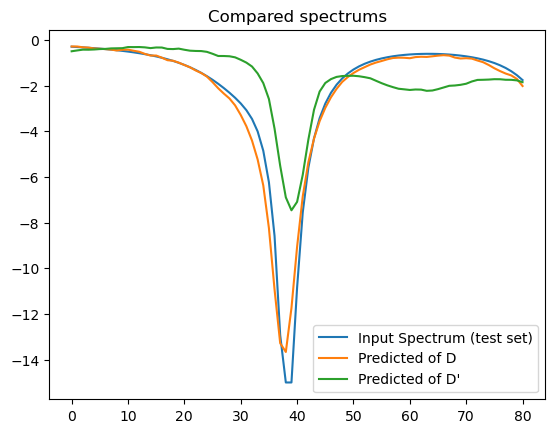

In [43]:
predict()

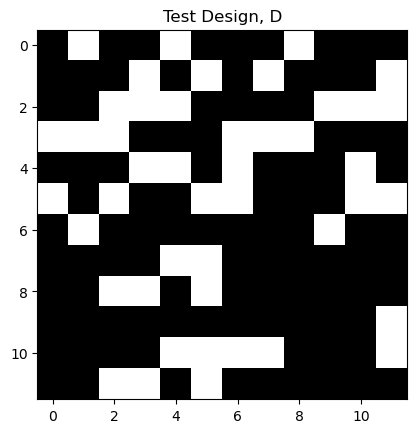

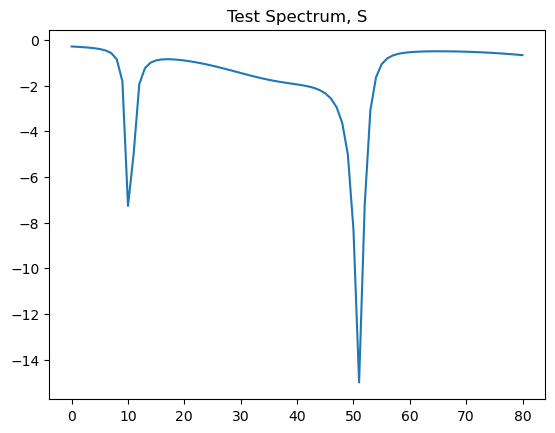

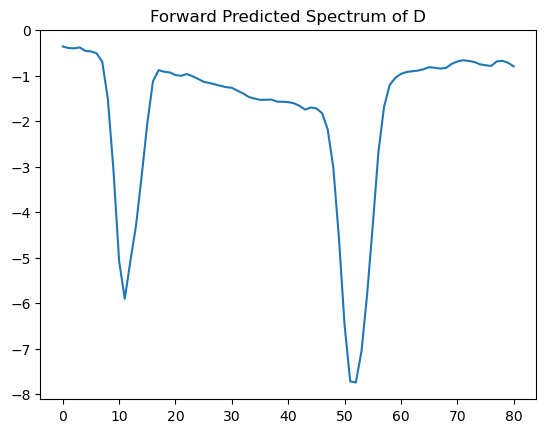

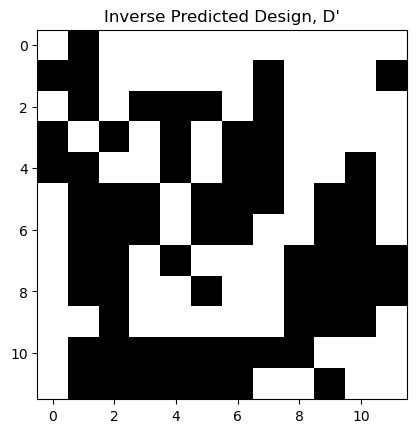

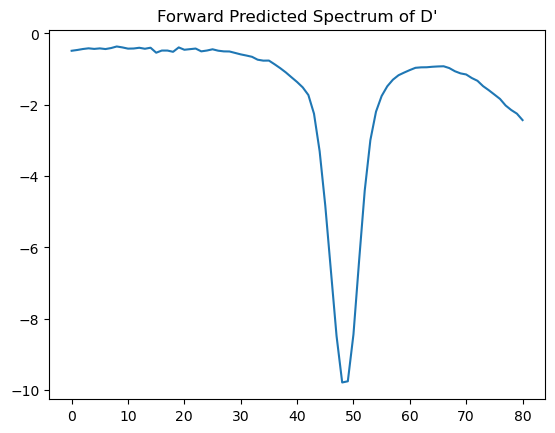

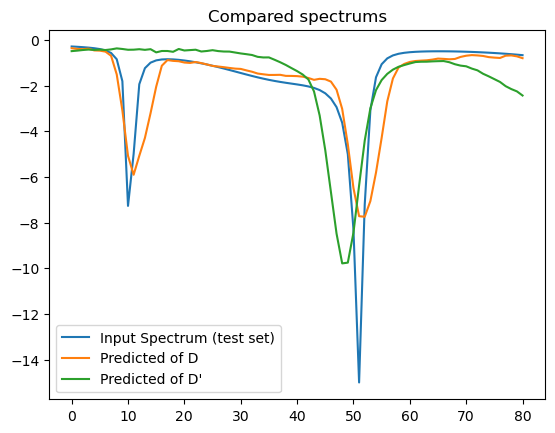

In [32]:
predict(65)

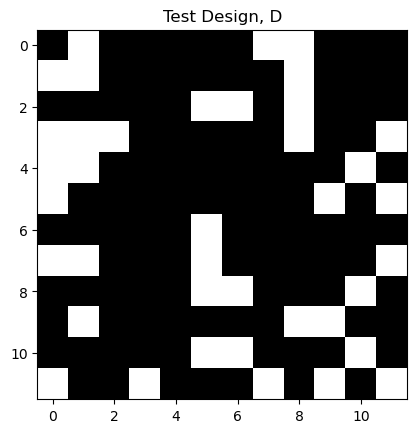

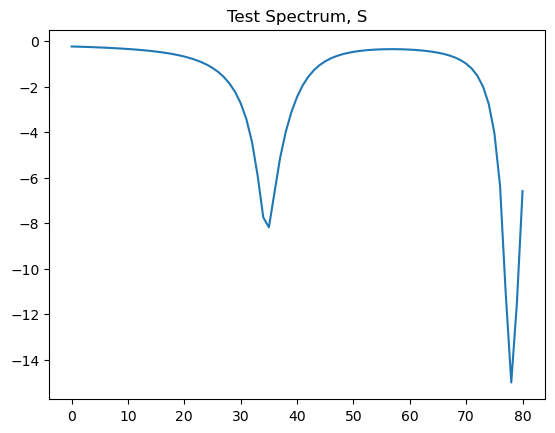

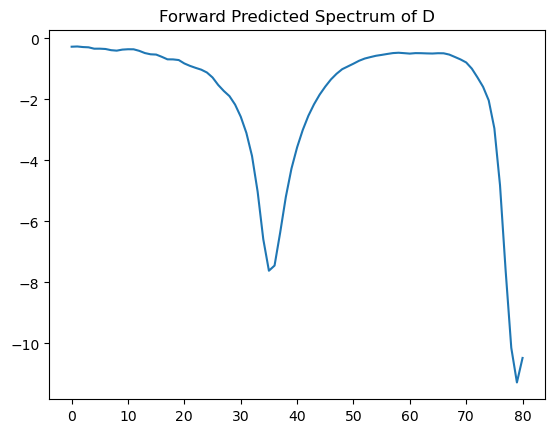

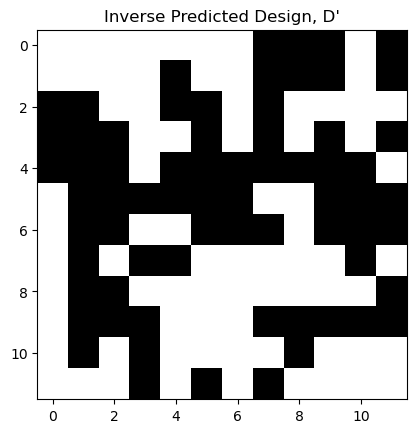

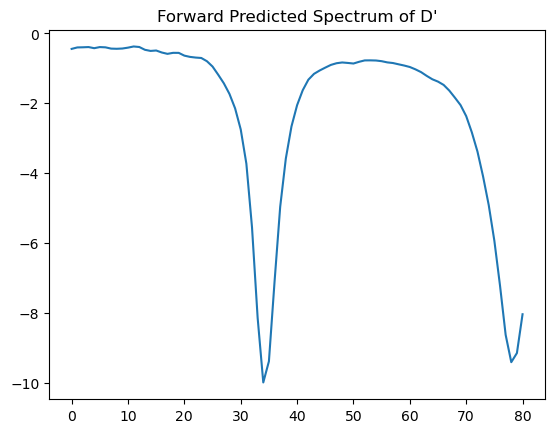

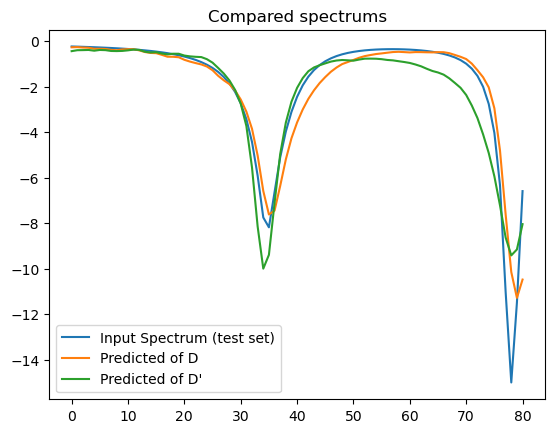

In [39]:
predict(2050)